# Build SQL Data Analysis Agents

### Want To Become A Full-Stack Generative AI Data Scientist?

![Generative AI Data Scientist](../../img/become_a_generative_ai_data_scientist.jpg)

I teach Generative AI Data Science to help you build AI-powered data science apps. [**Register for my next Generative AI for Data Scientists workshop here.**](https://learn.business-science.io/ai-register)


## Multi-Agents for SQL Data Analysis

**The SQL Data Analysis agent** we build in this tutorial is a multi-agent that can perform SQL queries on a database and optionally visualize the results. The agent combines 2 subagents:

1. **SQL Database Agent:** Query a database, perform basic data analysis, and return the results as a data frame.
2. **Data Visualization Agent:** Visualize the results if a user requests a plot.

This tutorial will show you how to connect up to a database and perform Data Analysis using SQL queries and visualizations, **all in one agent.** 

### Database

The database is the Northwind Database, a sample database that is used for ERP system demos. The Northwind Database is a contains tables for Customers, Orders, Products, and more.

# Build SQL Data Analysis Agents

### Table of Contents

1. [Introduction](#introduction)
2. [Load Libraries](#load-libraries)
3. [Setup AI and Logging](#setup-ai-and-logging)
4. [Connect to a SQL Database](#connect-to-a-sql-database)
5. [Create The Agent](#create-the-agent)
6. [Run the Agent](#run-the-agent)
7. [Response](#response)
    1. [SQL Query Code](#sql-query-code)
    2. [Pandas Data Frame From SQL Query](#pandas-data-frame-from-sql-query)
    3. [Python Pipeline Function](#python-pipeline-function)
8. [Make a Plot of Sales Revenue By Week And Territory](#make-a-plot-of-sales-revenue-by-week-and-territory)
9. [Free Generative AI Data Science Workshop](#free-generative-ai-data-science-workshop)


### Load Libraries

In [1]:
# * Libraries

from langchain_openai import ChatOpenAI

import sqlalchemy as sql
import pandas as pd
import os
import yaml

from ai_data_science_team.multiagents import SQLDataAnalyst
from ai_data_science_team.agents import SQLDatabaseAgent, DataVisualizationAgent

### Setup AI and Logging

This section of code sets up the LLM inputs and the logging information. Logging is used to store AI-generated code and files during the AI Data Science Teams processing of files. 

*Important Note:* This example uses OpenAI's API. But any LLM can be used such as Anthropic or local LLMs with Ollama.

In [2]:
# * Setup

MODEL    = "gpt-4o"
LOG      = True
LOG_PATH = os.path.join(os.getcwd(), "logs/")

os.environ["OPENAI_API_KEY"] = yaml.safe_load(open('../credentials.yml'))['openai']

llm = ChatOpenAI(model = MODEL)

llm


ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x7fb9286fd2d0>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x7fb8e8b31930>, root_client=<openai.OpenAI object at 0x7fb9286fee60>, root_async_client=<openai.AsyncOpenAI object at 0x7fb9286fd150>, model_name='gpt-4o', model_kwargs={}, openai_api_key=SecretStr('**********'))

### Connect to a SQL Database

Next, let's connect to the leads data from a SQL database. We will need to use a `sqlalchemy` connection to use the SQL Database Agent.

In [3]:
sql_engine = sql.create_engine("sqlite:///data/northwind.db")

conn = sql_engine.connect()

conn

### Create The Agent

Run this code to create the agent with `SQLDataAnalyst()`. This will create a multi-agent that can perform SQL queries on a database and optionally visualize the results. This agent combines 2 subagents:

#### SQLDatabaseAgent

The `SQLDatabaseAgent` is a subagent that queries a database, performs basic data analysis, and returns the results as a data frame.

#### DataVisualizationAgent

The `DataVisualizationAgent` is a subagent that visualizes the results if a user requests a plot.

Run this code to create the multi-agent:

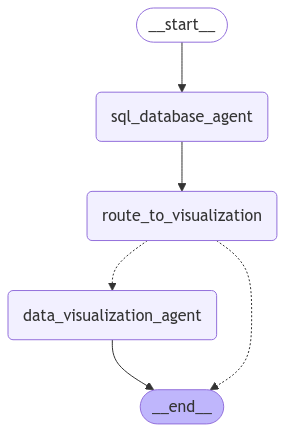

In [4]:
sql_data_analyst = SQLDataAnalyst(
    model = llm,
    sql_database_agent = SQLDatabaseAgent(
        model = llm,
        connection = conn,
        n_samples = 1,
        log = LOG,
        log_path = LOG_PATH,
        bypass_recommended_steps=False,
    ),
    data_visualization_agent = DataVisualizationAgent(
        model = llm,
        n_samples = 10,
        log = LOG,
        log_path = LOG_PATH,
    )
)

sql_data_analyst

### Viewing Subagents With xray

Keep in mind that this agent is actually a multi-agent that combines 2 subagents. We can view the subagents by running the following code:

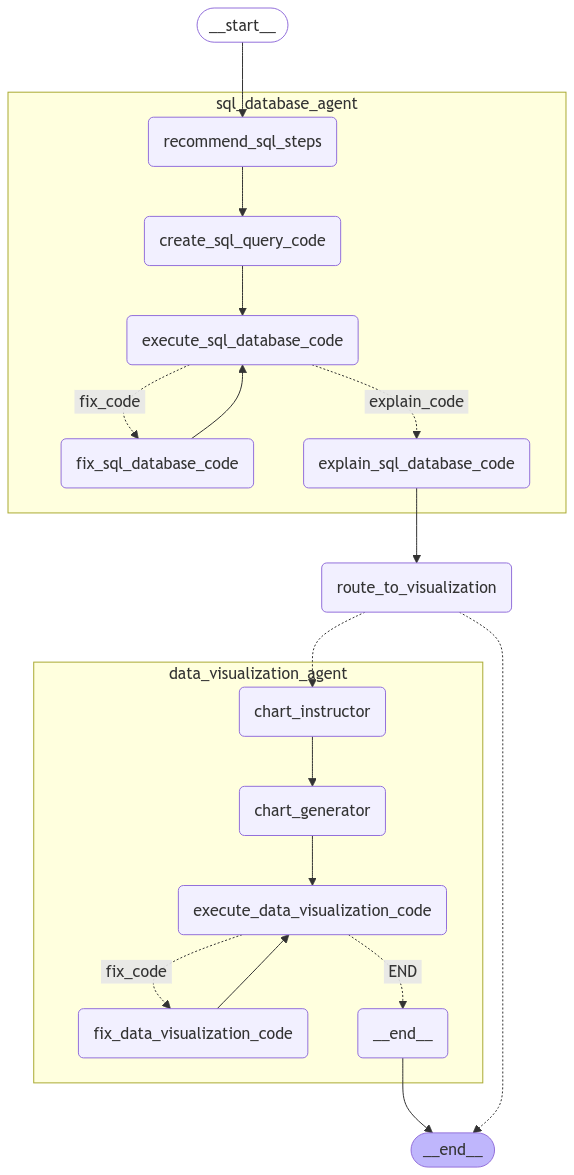

In [5]:
sql_data_analyst.show(xray=1)

## Run the Agent

The main inputs to the SQL DB Agent are:

- **user_instructions**: What actions you'd like to take on the SQL database query. 

Let's start with a simple question that a user might want to know about the database:

## What tables are in the database?

In [ ]:
sql_data_analyst.invoke_agent(
    user_instructions = "What tables are in the database?",
)

---SQL DATABASE AGENT----
    * RECOMMEND STEPS
    * CREATE SQL QUERY CODE
    * CREATE PYTHON FUNCTION TO RUN SQL CODE
      File saved to: /Users/mdancho/Desktop/course_code/ai-data-science-team/logs/sql_database.py
    * EXECUTING AGENT CODE ON SQL CONNECTION
    * EXPLAIN AGENT CODE


### Response

The response produced contains everything we need to understand the data cleaning decisions made and get the cleaned dataset. 

In [8]:
sql_data_analyst.get_state_keys()

['messages',
 'user_instructions',
 'sql_query_code',
 'sql_database_function',
 'data_sql',
 'data_raw',
 'plot_required',
 'data_visualization_function',
 'plotly_graph']

Not all fields will be filled if the agent did not need to use them.

- **sql_query_code**: The SQL query code that was generated by the agent.
- **sql_database_function**: The Python function that was generated by the SQL Database Agent.
- **data_sql**: The Pandas data frame that was generated by the agent.
- **data_visualization_function**: The Python function that was generated by the Data Visualization Agent.
- **plotly_graph**: The Plotly graph that was generated by the Data Visualization Agent.

#### SQL Query Code

In [10]:
sql_data_analyst.get_sql_query_code(markdown=True)

```sql
SELECT name FROM sqlite_master WHERE type='table';
```

#### Pandas Data Frame From SQL Query

In [11]:
sql_data_analyst.get_data_sql()

,name
0,Categories
1,sqlite_sequence
2,CustomerCustomerDemo
3,CustomerDemographics
4,Customers
5,Employees
6,EmployeeTerritories
7,Order Details
8,Orders
9,Products


#### Python Pipeline Function

In [12]:
sql_data_analyst.get_sql_database_function(markdown=True)

```python
# Disclaimer: This function was generated by AI. Please review before using.
# Agent Name: sql_database_agent
# Time Created: 2025-01-12 20:13:41


def sql_database_pipeline(connection):
    import pandas as pd
    import sqlalchemy as sql
    
    # Create a connection if needed
    is_engine = isinstance(connection, sql.engine.base.Engine)
    conn = connection.connect() if is_engine else connection

    sql_query = '''
    SELECT name FROM sqlite_master WHERE type='table';
    '''
    
    return pd.read_sql(sql_query, connection)
        
```

## Make a Plot of Sales Revenue By Week And Territory

Once the user has knowledge of the tables in the database, they can ask more complex questions.

Let's make a plot of sales revenue by week and territory. This will require a more complex SQL query and a Data Visualization. 

*Note: This is a more complex question, which may require a high performance model such as "gpt-4o". Results will vary by model.*

In [5]:
sql_data_analyst.invoke_agent(
    user_instructions = "Make a plot of sales revenue by month by territory. Make a dropdown for the user to select the territory.",
)

---SQL DATABASE AGENT----
    * RECOMMEND STEPS
    * CREATE SQL QUERY CODE
    * CREATE PYTHON FUNCTION TO RUN SQL CODE
      File saved to: /Users/mdancho/Desktop/course_code/ai-data-science-team/logs/sql_database.py
    * EXECUTING AGENT CODE ON SQL CONNECTION
    * EXPLAIN AGENT CODE
---DATA VISUALIZATION AGENT----
    * CREATE CHART GENERATOR INSTRUCTIONS
    * CREATE DATA VISUALIZATION CODE
      File saved to: /Users/mdancho/Desktop/course_code/ai-data-science-team/logs/data_visualization.py
    * EXECUTING AGENT CODE


In [6]:
sql_data_analyst.get_plotly_graph()

![Sales Trends](../img/sales_trends_by_territory.jpg)

# Want To Become A Full-Stack Generative AI Data Scientist?

![Generative AI Data Scientist](../../img/become_a_generative_ai_data_scientist.jpg)

I teach Generative AI Data Science to help you build AI-powered data science apps. [**Register for my next Generative AI for Data Scientists workshop here.**](https://learn.business-science.io/ai-register)